# ALGORITMOS DE ORDENAÇÃO $ N \cdot LOG ~N $

### Proposta:

### Alunos:

- Welison Lucas Almeida Regis - 2019.1,
- Lieverton Santos Silva - 2019.1.

# IMPORTS

In [1]:
import pandas as pd
import random
import time
import plotly.graph_objs as go

from matplotlib import pyplot as plt
from itertools import chain
from ipywidgets import IntProgress

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

# OLYMPIC ATHLETE CLASS

In [2]:
class Athlete:
    
    def __init__(self, name, sex, team, NOC, season, city, event, medal):
        self.name = name
        self.sex = sex
        self.team = team
        self.NOC = NOC
        self.season = season
        self.city = city
        self.event = event
        self.medal = medal

# READ ATHLETES FROM CSV

In [3]:
def read_csv(filename = './assets/athlete_events.csv'): 
    """Method to read specific soccer informations from csv file
    
    attributes:
        filename: path to csv file with athletes data.
    """
    
    print(">>>>>> LOADING <<<<<<")
    
    bar = IntProgress(min=0, max = 271116, description='PROGRESS:') # instantiate the bar
    display(bar)
    
    df = pd.read_csv(filename, usecols=['Name', 'Sex', 'Team', 'NOC', 'Season', 'City', 'Event', 'Medal'])
    
    athletes = []
    for index, row in df.iterrows():
        name = row['Name'].strip().title()
        sex = row['Sex']
        team = row['Team']
        NOC = row['NOC']
        season = row['Season']
        city = row['City']
        event = row['Event']
        medal = row['Medal']
        
        athlete = Athlete(name, sex, team, NOC, season, city, event, medal)
        athletes.append(athlete)
        
        bar.value += 1
        
    print("LOADING OK!!!")
        
    return athletes

In [4]:
# LIST OF ATHLETES OBJECTS
ATHLETES = read_csv()

>>>>>> LOADING <<<<<<


IntProgress(value=0, description='PROGRESS:', max=271116)

LOADING OK!!!


# DATASET EXAMPLE

In [5]:
def generate_random_athletes(athletes, n = 5):
    
    random_athletes = []
    for i in range(n):
        athlete = random.choices(athletes)
        random_athletes.append(athlete)
    
    return random_athletes

In [6]:
def athletes_info(athletes):
    athletes = generate_random_athletes(athletes, 5)
        
    athletes_table = []
    for athlete in athletes:
        athlete = athlete[0].__dict__.values()
        athletes_table.append(athlete)

    df = pd.DataFrame(
        athletes_table,
        columns=['Nome', 'Sexo', 'Time', 'NOC', 'Temporada', 'Cidade', 'Evento', 'Medalha']
    )

    return df

In [7]:
athletes_info(ATHLETES.copy())

,Nome,Sexo,Time,NOC,Temporada,Cidade,Evento,Medalha
0,Renato Villalta,M,Italy,ITA,Summer,Los Angeles,Basketball Men's Basketball,NaN
1,Jose Armando Vega,M,United States,USA,Summer,Melbourne,Gymnastics Men's Floor Exercise,NaN
2,Pavel Vladimirovich Sukhov,M,Russia,RUS,Summer,Rio de Janeiro,"Fencing Men's epee, Individual",NaN
3,Klete D. Keller,M,United States,USA,Summer,Athina,Swimming Men's 200 metres Freestyle,NaN
4,Franck Schott,M,France,FRA,Summer,Atlanta,Swimming Men's 4 x 100 metres Medley Relay,NaN


# VISUALIZING DATA WITH PANDAS AND PLOTLY

In [8]:
ATHLETE_EVENTS_CSV = pd.read_csv('./assets/athlete_events.csv')
NOC_REGIONS_CSV = pd.read_csv('./assets/noc_regions.csv')

### Count number of competitors per olympic

In [9]:
def plot_summer_winter_athletes(olympics_df):
    summer_df = olympics_df[olympics_df['Season'] == 'Summer']
    winter_df = olympics_df[olympics_df['Season'] == 'Winter']

    summer = go.Scatter(
        x = summer_df['Year'],
        y = summer_df['Athletes'],
        name="Jogos de Verão",
        marker=dict(color="Green"),
        mode = "markers+lines"
    )
    winter = go.Scatter(
        x = winter_df['Year'],
        y = winter_df['Athletes'],
        name="Jogos de Inverno",
        marker=dict(color="Red"),
        mode = "markers+lines"
    )

    data = [summer, winter]
    layout = dict(title = 'Competidores por Olimpíadas',
              xaxis = dict(title = 'Ano', showticklabels=True), 
              yaxis = dict(title = 'Número de Competidores'),
              hovermode = 'closest'
             )
    fig = dict(data=data, layout=layout)
    iplot(fig, filename='olympic_athletes')

In [10]:
olympic_athletes = ATHLETE_EVENTS_CSV.groupby('Year')['Season'].value_counts()

olympics_df = pd.DataFrame(
    data = {'Athletes': olympic_athletes.values},
    index = olympic_athletes.index
).reset_index()


plot_summer_winter_athletes(olympics_df)

# OLYMPIC GAMES - COUNTRY'S PARTICIPATION

### Draw 3D map with countries partition

In [11]:
def draw_map(dataset, title, colorscale, map_type = 'orthographic'):
    trace = go.Choropleth(
                locations = dataset['Country'],
                locationmode = 'country names',
                z = dataset['Editions'],
                text = dataset['Country'],
                autocolorscale = False,
                reversescale = False,
                colorscale = colorscale,
                marker = dict(
                    line = dict(
                        color = 'rgb(0,0,0)',
                        width = 0.5)
                ),
                colorbar = dict(
                    title = 'Edições',
                    tickprefix = '')
            )

    data = [trace]
    layout = go.Layout(
        title = title,
        geo = dict(
            showframe = True,
            showlakes = False,
            showcoastlines = True,
            projection = dict(
                type = map_type
            )
        )
    )
    
    fig = dict( data=data, layout=layout)
    iplot(fig)

### Merge athletes with regions datasets

In [12]:
olympics_df = ATHLETE_EVENTS_CSV.merge(NOC_REGIONS_CSV)
olympics_df = olympics_df.rename(columns = {'region':'Country'})

countries_participations = olympics_df.groupby(['Country', 'Season'])['Year'].nunique()

olympic_editions = pd.DataFrame(
    data={'Editions': countries_participations.values},
    index=countries_participations.index
).reset_index()

## Participation per country in summer editions

In [13]:
summer = olympic_editions['Season'] == 'Summer'
summer_editions = olympic_editions[summer]

draw_map(summer_editions, 'PARTICIPAÇÃO MUNDIAL NOS JOGOS OLÍMPICOS DE VERÃO', "Reds")

## Participation per country in winter editions

In [14]:
winter = olympic_editions['Season'] == 'Winter'
winter_editions = olympic_editions[winter]

draw_map(winter_editions, 'PARTICIPAÇÃO MUNDIAL NOS JOGOS OLÍMPICOS DE INVERNO', "Blues", 'equirectangular')

## BUCKET SORT

In [15]:
def bucket_sort(athletes):
    """Implement bucket sort algorithm
    
    Attributes:
        athletes: list with all olympic athletes.
    """
    
    length = int(len(athletes))
 
    buckets = [[] for _ in range(26)]
    for i in range(length):
        bucket = int(ord(athletes[i].name[0])) - 65
        if bucket >= 0 and bucket < 26 :
            buckets[bucket].append(athletes[i])
 
    return buckets

In [16]:
def bucket_quick_sort(athletes):
    
    buckets = bucket_sort(athletes)
    
    for i in range(len(buckets)):
        quick_sort(buckets[i])

    return list(chain(*buckets))

In [17]:
def bucket_merge_sort(athletes):
    
    buckets = bucket_sort(athletes)
    
    for i in range(len(buckets)):
        merge_sort(buckets[i])

    return list(chain(*buckets))

In [18]:
def show_buckets(len_buckets):
    
    plt.grid(which='major', axis='y', color='green', linewidth=0.3)
    plt.bar([i for i in range(1,27)], height=len_buckets) 
    plt.xticks([i for i in range(1,27)], [chr(i) for i in range(65,91)])
    plt.xlabel('buckets')
    plt.ylabel('athletes')
    
    plt.plot()

In [19]:
def length_bucket(buckets):
    len_buckets = []
    for i in range(len(buckets)):
        len_buckets.append(len(buckets[i]))
    
    show_buckets(len_buckets)

### BUCKET SPLIT

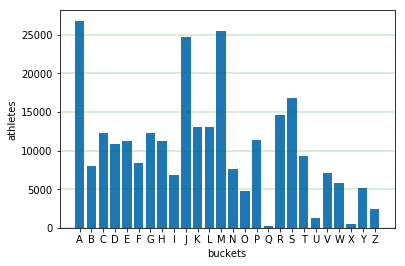

In [20]:
bucket = bucket_sort(ATHLETES.copy())
length_bucket(bucket)

## QUICK SORT

In [21]:
def partition(athletes, low, high): 
    i = ( low-1 )        
    pivot = athletes[high]      
  
    for j in range(low , high): 
        if athletes[j].name <= pivot.name: 
            i += 1 
            athletes[i], athletes[j] = athletes[j], athletes[i] 
  
    athletes[i+1], athletes[high] = athletes[high], athletes[i+1] 
    return ( i+1 ) 
  
def quick_sort(athletes, low = 0, high = None):
    """Implement quick sort algorithm
    
    Attributes:
        athletes: list with all olympic athletes.
    """
    if high is None:
        high = len(athletes) - 1
    if low < high: 
        pivot = partition(athletes,low,high) 
        quick_sort(athletes, low, pivot - 1) 
        quick_sort(athletes, pivot + 1, high) 
    return athletes

## MERGE SORT

In [22]:
def merge_sort(athletes):
    """Implement merge sort algorithm
    
    Attributes:
        athletes: list with all olympic athletes.
    """
    if(len(athletes) > 1):
        middle = int(len(athletes)/2)

        left = athletes[:middle]
        right = athletes[middle:]

        merge_sort(left)
        merge_sort(right)

        i, j, k = [0, 0, 0]

        while(i < len(left) and j < len(right)):
            if(left[i].name < right[j].name):
                athletes[k] = left[i]
                i += 1
            else:
                athletes[k] = right[j]
                j += 1

            k += 1

        while(i < len(left)):
            athletes[k] = left[i]
            k += 1
            i += 1

        while(j < len(right)):
            athletes[k] = right[j]
            j += 1
            k += 1
    return athletes

## ALGORITHM COMPLEXITY

In [23]:
def execution_time(athletes, function):
    """Time taken to sort athletes with certain function
    
    Attributes:
        athletes: list with all olympic athletes;
        function: bucket_quick_sort, bucket_merge_sort, quick_sort or merge_sort.
    """
    begin = time.time()
    function(athletes.copy())
    end = time.time()

    time_spend = end - begin
    
    return time_spend

In [24]:
def algorithms_complexity(athletes):
    """Evaluate taken time to four sort algorithms methods
    
    Attributes:
        athletes: list with all olympic athletes;
    """
    print(">>> LOADING <<<: GENERATING GRAPHIC!")
    
    functions = [bucket_quick_sort, bucket_merge_sort, quick_sort, merge_sort]
    
    bar = IntProgress(min=0, max = 4, description='PROGRESS:') # instantiate the bar
    display(bar)
    
    times = []
    for function in functions:
        time_spend = execution_time(athletes.copy(), function)
        times.append(time_spend)
        
        bar.value += 1
    
    return times

In [25]:
def show_algorithms_complexity(times):
    """Plot algorithm complexity of four sort algorithms
    
    Attributes:
        times: list with time taken to evaluate bucket, quick and merge algorithms.
    """
    plt.grid(which='major', axis='y', color='green', linewidth=0.3)
    plt.bar([1, 2, 3, 4], height=times) 
    plt.xticks([1, 2, 3, 4], ['bucket_quick','bucket_merge','quick','merge'])
    plt.xlabel('sort method')
    plt.ylabel('seconds')
    
    plt.plot()

## COMPUTE ALGORITHMS TIME COMPLEXITY

>>> LOADING <<<: GENERATING GRAPHIC!


IntProgress(value=0, description='PROGRESS:', max=4)

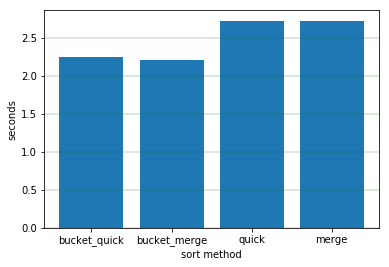

In [26]:
times_unordered = list(algorithms_complexity(ATHLETES.copy()))
show_algorithms_complexity(times_unordered)